### **Exercise1:**

Create a function returning the first N terms of the tailor series of the function without using the sympy `series` function.

In [89]:
import sympy as sp

def taylor(fun, x0=0, N=0):
    """ fun must be symbolic, a function of x"""
    symbol = list(expr.free_symbols)
    if len(symbol) > 1:
        print("error: nter one variable function")
        return
    x = symbol[0] 

    # store all derivatives 
    derivatives = [fun]
    for i in range(N):
        derivatives.append(sp.diff(derivatives[i]))
    print(derivatives)

    sy_x0 = sp.symbols(' x_0') # symbol for x_0
    derivates_computed = [item.subs(x, sy_x0) for item in derivatives]
    print(derivates_computed)

    sy_N = sp.symbols('n') # symbol for N

    expression = derivates_computed[0]
    for i in range(1,N):
        idx = sp.symbols('{}'.format(i))
        expression =  derivates_computed[i]*(x-sy_x0)**(i)*(1/sp.factorial(idx)) + expression
    
    return expression

    


x = sp.symbols('x')
expr = sp.sin(x)
taylor(fun=expr, N= 5)


[sin(x), cos(x), -sin(x), -cos(x), sin(x), cos(x)]
[sin(x_0), cos(x_0), -sin(x_0), -cos(x_0), sin(x_0), cos(x_0)]


(x - x_0)**4*sin(x_0)/factorial(4) - (x - x_0)**3*cos(x_0)/factorial(3) - (x - x_0)**2*sin(x_0)/factorial(2) + (x - x_0)*cos(x_0)/factorial(1) + sin(x_0)

### **Exercise2:**

Create a decorator that checks if the passed array is empty and only calls the function if it's not


In [111]:
def decorator(func):
    def wrapper(*args, **kwargs):
        func_result = func(*args, **kwargs)
        # if func_result is empty
        if not func_result:
            return "empty list. Function '{}' not called".format(func.__name__)
        return func_result
    return wrapper

@decorator
def array(arr):
    return arr

@decorator
def array1(arr):
    print("hello")
    return arr

array([1])

[1]

In [90]:
import time

def timestamp(func):
    def wrapper(*args, **kwargs):
        print(f"Called at {time.time()}:", end=" ")
        result = func(*args, **kwargs)
        return result
    return wrapper

@timestamp
def greet(name):
    return f"Hello, {name}!"

print(greet("Alice"))


Called at 1676048737.281369: Hello, Alice!


### **Exercise3:**

Create a decorator to time a function execution time. Hint: use `import time` and `time_point=time.time()`. You can check if it's correct by timing the `time.sleep` function.

In [116]:
import time

def decorator(func):
    def wrapper(*args, **kwargs):
        start = time.time()
        func(*args, **kwargs)
        end = time.time()
        return end - start
    return wrapper

@decorator
def myfunction():
    return time.sleep(5)

myfunction()

5.005062818527222

### **Exercise4:**

Create a decorator to plot a function over some fixed interval.

plot of 'sin' over [-10,10]
plot of 'cos' over [-10,10]


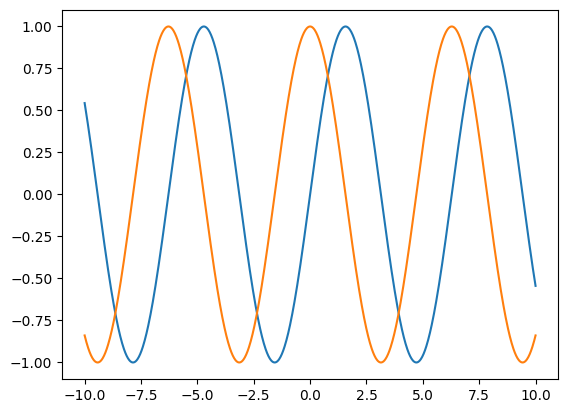

In [136]:
import numpy as np
from matplotlib import pyplot as plt

def plot_over_interval(func):
    def wrapper():
        print("plot of '{}' over [-10,10]".format(func.__name__))
        x = np.linspace(-10,10,1000)
        y = func(x)
        return plt.plot(x,y)
    return wrapper

@plot_over_interval
def x_squared(x):
    return x*x

@plot_over_interval
def  cos(x):
    return np.cos(x)

@plot_over_interval
def  sin(x):
    return np.sin(x)

#x_squared()
sin()
cos()